In [2]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime

In [3]:
# Load dataset
df = pd.read_csv(r'C:\Users\Lenovo Legion\Desktop\time-series-19-covid-combined.csv')

df.head(10)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
5,2020-01-27,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
6,2020-01-28,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
7,2020-01-29,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
8,2020-01-30,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
9,2020-01-31,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [4]:
country = df['Country/Region'].unique()
country.sort()

print(country)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
sea_countries = [
    'Indonesia', 'Malaysia', 'Singapore', 'Philippines', 'Thailand', 
    'Vietnam', 'Cambodia', 'Brunei', 'Burma', 'Laos', 'Timor-Leste'
]

asia_countries = [
    'Indonesia', 'Sri Lanka', 'China', 'Japan', 
    'Korea, South',' United Arab Emirates'
]



In [7]:
#-------------------------- Filter Data --------------------------------------------------------------
df_sea = df[df['Country/Region'].isin(sea_countries)]
df_asia = df[df['Country/Region'].isin(asia_countries)]


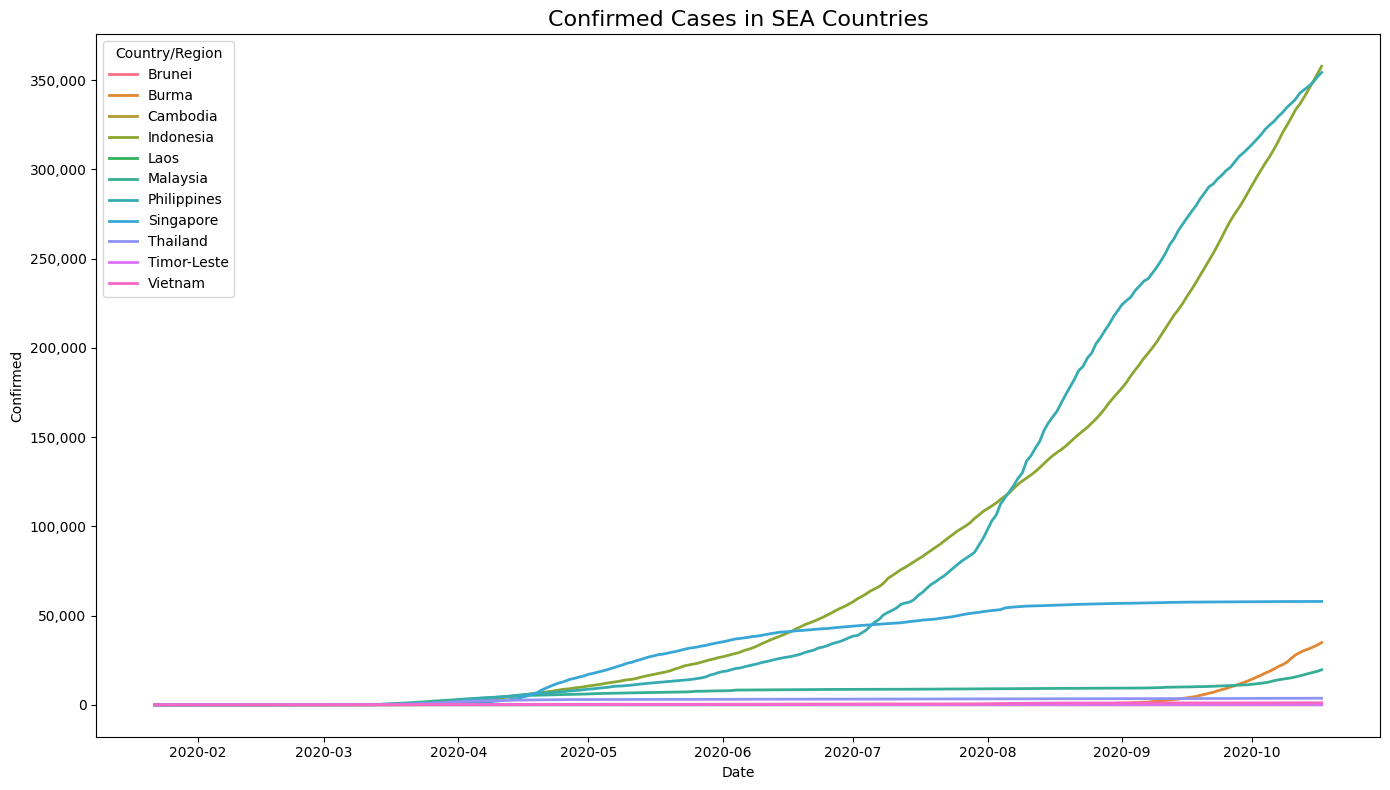

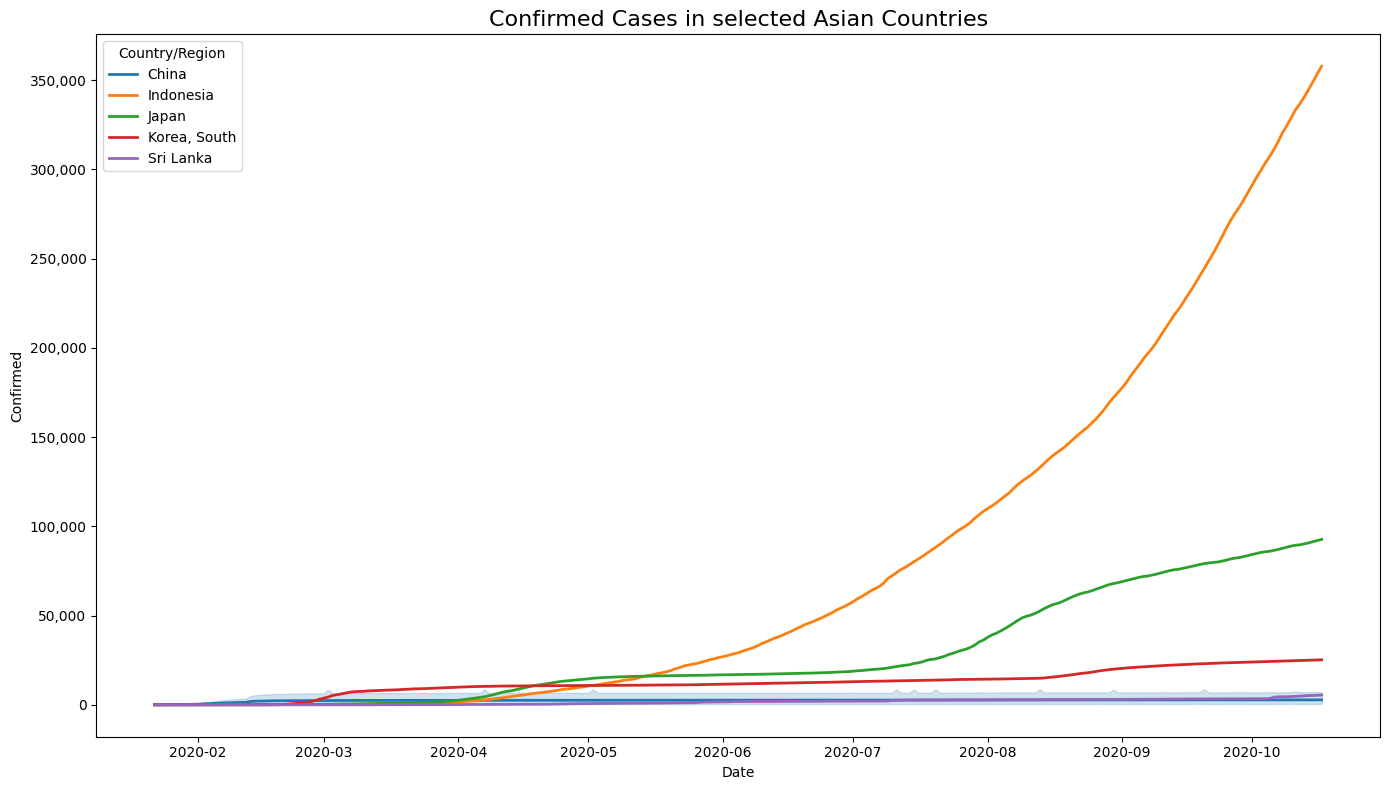

In [8]:
plt.figure(1, figsize=(14, 8))

ax1 = sns.lineplot(data=df_sea, x='Date', y='Confirmed', hue='Country/Region', linewidth=2)
ax1.set_title('Confirmed Cases in SEA Countries', fontsize=16)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()


plt.figure(2, figsize=(14, 8))

ax2 = sns.lineplot(data=df_asia, x='Date', y='Confirmed', hue='Country/Region', linewidth=2)
ax2.set_title('Confirmed Cases in selected Asian Countries', fontsize=16)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()


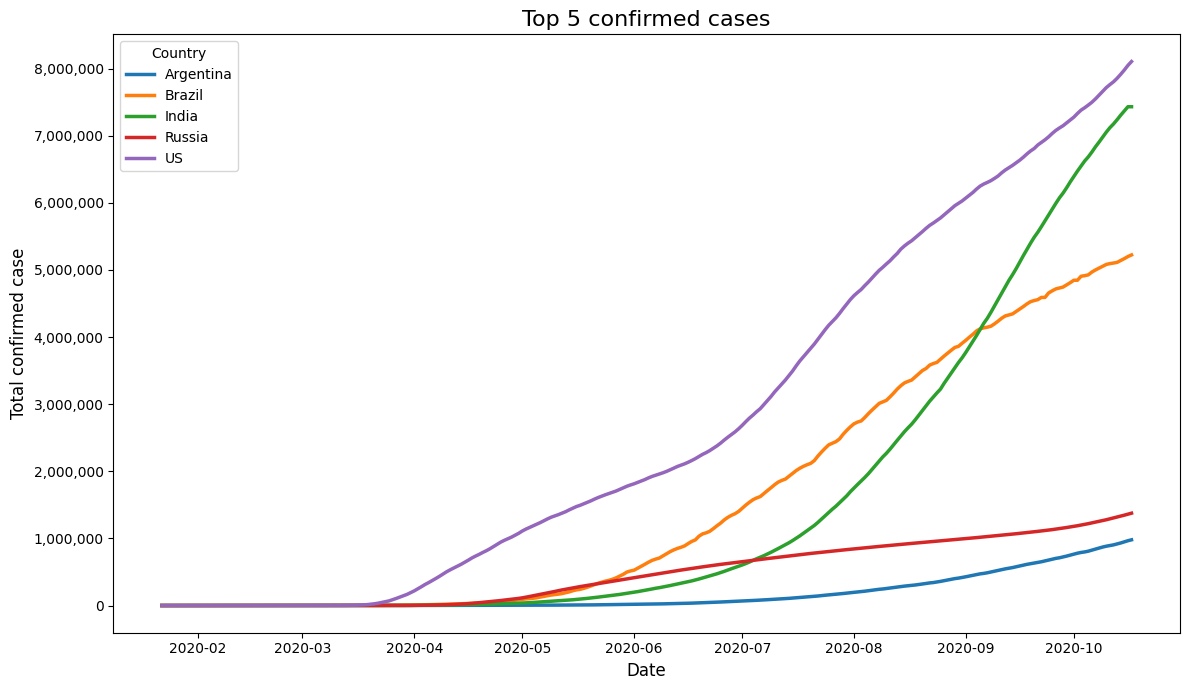

In [9]:
# 1. Identify top 5 countries with confirmed cases
top_5_country_names = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5).index

# 2. Filter DataFrame
df_top5 = df[df['Country/Region'].isin(top_5_country_names)]

# 3. visualize
plt.figure(figsize=(12, 7))

ax = sns.lineplot(data=df_top5, x='Date', y='Confirmed', hue='Country/Region', linewidth=2.5)

plt.title('Top 5 confirmed cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total confirmed case', fontsize=12)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(title='Country')
plt.tight_layout()

# Menampilkan grafik
plt.show()